<a href="https://colab.research.google.com/github/KezhenLi/Homework5/blob/main/homework5.4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import urllib.request
from numpy.fft import rfft, irfft
from numpy import loadtxt, zeros, copy, floor, linspace, array,empty,arange,exp,real,imag,pi
from matplotlib.pylab import plot, show

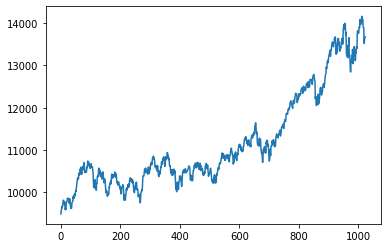

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


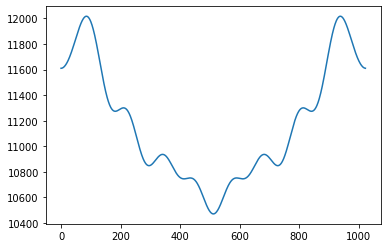

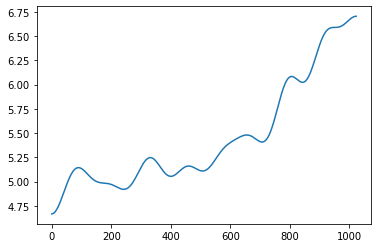

In [11]:
#(a)
url='http://www-personal.umich.edu/~mejn/cp/data/dow2.txt'
with urllib.request.urlopen(url) as response:
     html = response.read()
data=html.decode().split("\n")
dow2 = loadtxt(data, float)
plot(dow2)
show()
dow2Fourier = rfft(dow2)
N = len(dow2Fourier)
first2percent = zeros(N, float)
first2percent[0 : int(N / 50)] = copy(dow2Fourier[0 : int(N / 50)])
smootheddow2 = irfft(first2percent)
plot(smootheddow2)
show()
#(b)
def dct(y):
    N = len(y)
    y2 = empty(2*N,float)
    y2[:N] = y[:]
    y2[N:] = y[::-1]

    c = rfft(y2)
    phi = exp(-1j*pi*arange(N)/(2*N))
    return real(phi*c[:N])

def idct(a):
    N = len(a)
    c = empty(N+1,complex)

    phi = exp(1j*pi*arange(N)/(2*N))
    c[:N] = phi*a
    c[N] = 0.0
    return irfft(c)[:N]

dow2dct = dct(dow2)
N2 = len(dow2dct)
dctfirst2percent = zeros(N2, float)
dctfirst2percent[0 : int(N2 / 50)] = copy(dow2dct[0 : int(N2 / 50)])
smootheddow2dct = idct(dctfirst2percent) / (2*N2) 
plot(smootheddow2dct)
show()
